In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)

/Users/glebradchenko/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Reading CSV and setting timeseries as index.

In [3]:
df=pd.read_csv('../data/df_cleaned.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index("datetime",inplace=True)

Method to plot dataframes

In [4]:
def plot_eda(df,title,save,ylabe="Station"):
    # Initialize the matplotlib figure   
    f, ax = plt.subplots(figsize=(6, 15))
    f.tight_layout()
    # Plot
    kwargs = {'alpha':0.85}
    sns.set_color_codes("pastel")
    sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
    sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
    ax.set_title(title,fontsize=16)
    ax.set_xlabel('Passengers', fontsize = 16)
    ax.set_ylabel(ylabe, fontsize = 16)
    ax.legend(fontsize = 16)
    # plt.subplots_adjust(bottom=0.15,left=0.3,right=3)

    plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")
    return f,ax;


Getting top and bottom ten station by passengers amount.

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top stations by entries'}, xlabel='Passengers', ylabel='Station'>)

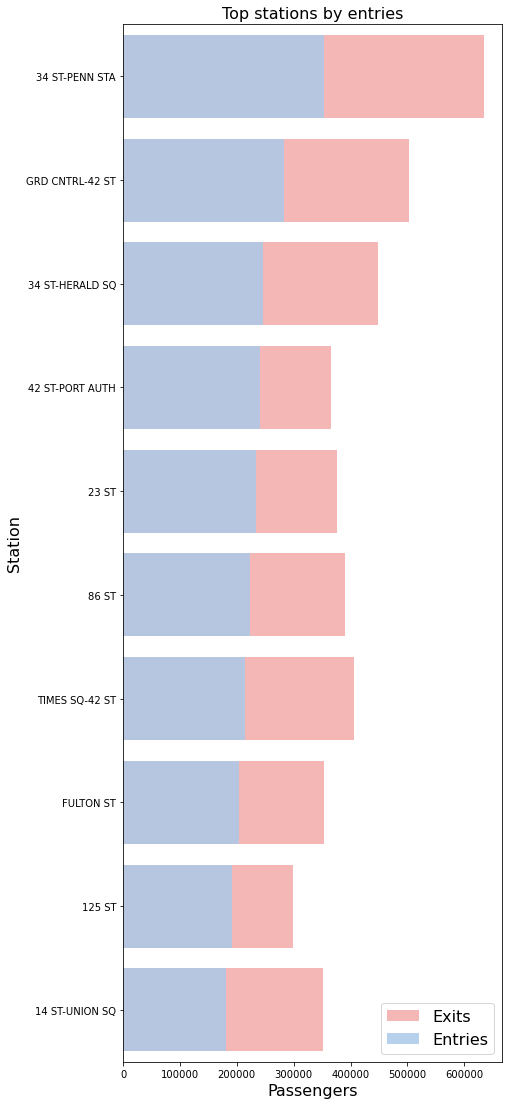

In [5]:
entries_top=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_top,"Top stations by entries","entries_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom stations by entries'}, xlabel='Passengers', ylabel='Station'>)

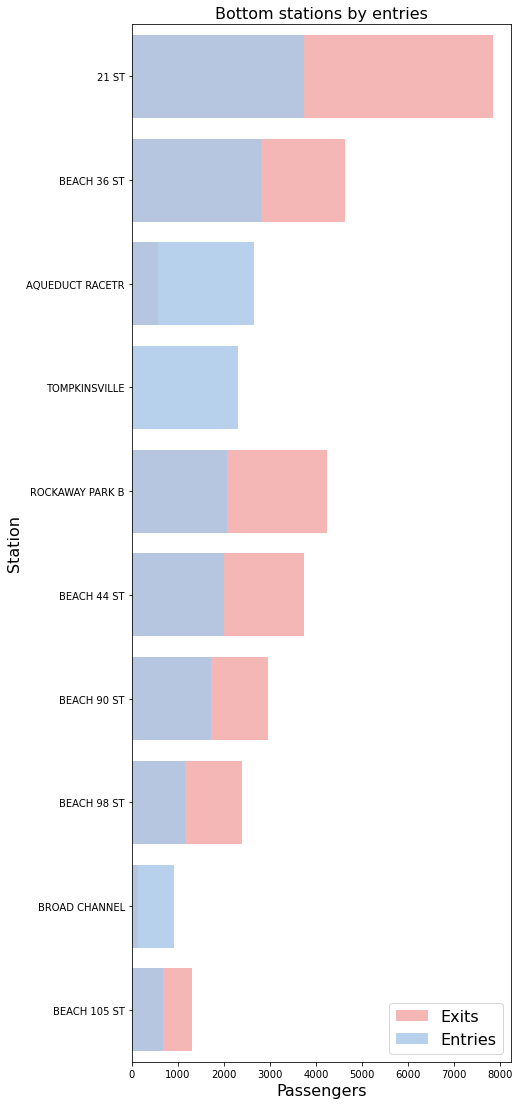

In [6]:
entries_bottom=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).tail(10)
plot_eda(entries_bottom,"Bottom stations by entries","entries_bottom")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top stations by exits'}, xlabel='Passengers', ylabel='Station'>)

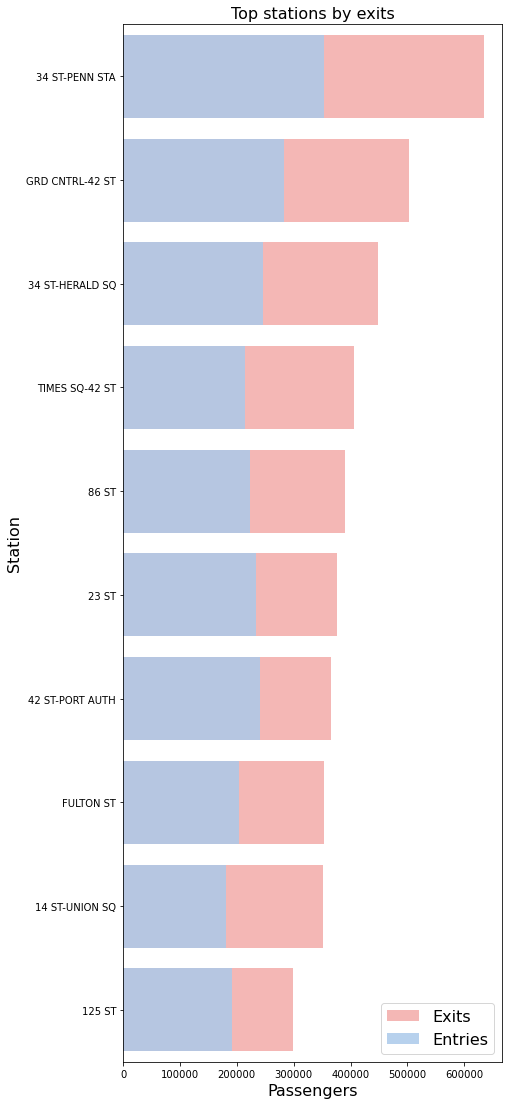

In [7]:
exits_top=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_top,"Top stations by exits","exits_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom stations by exits'}, xlabel='Passengers', ylabel='Station'>)

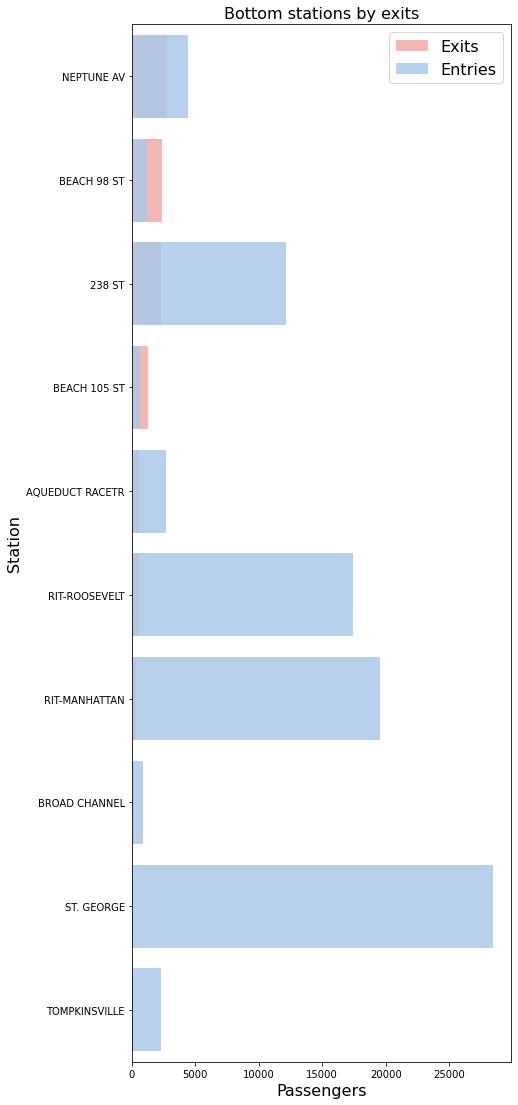

In [8]:
exits_bottom=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).tail(10)

plot_eda(exits_bottom,"Bottom stations by exits","exits_bottom")

In [9]:
df[df["station"]=="TOMPKINSVILLE"].head()

,stat_id,unit,scp,station,linename,entries_abs,exits_abs
datetime,,,,,,,
2022-10-01 02:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,7,0
2022-10-01 06:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,2,0
2022-10-01 10:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,23,0
2022-10-01 14:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,3,0
2022-10-01 18:00:00,TOMPKINSVILLE 00-00-00 S102,R165,00-00-00,TOMPKINSVILLE,1,10,0


Mean amount of people per line daily.

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top line per entries'}, xlabel='Passengers', ylabel='Station'>)

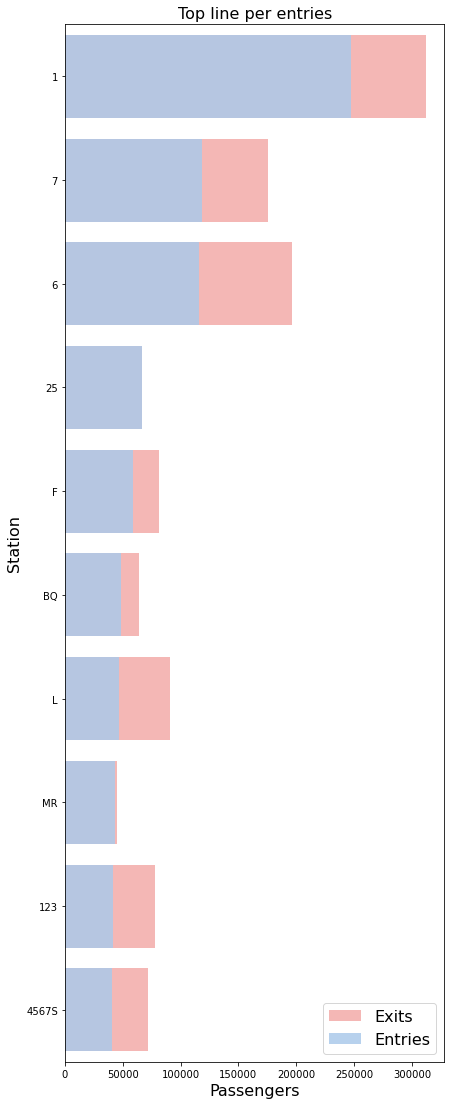

In [10]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_line,"Top line per entries","line_top")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom line per entries'}, xlabel='Passengers', ylabel='Station'>)

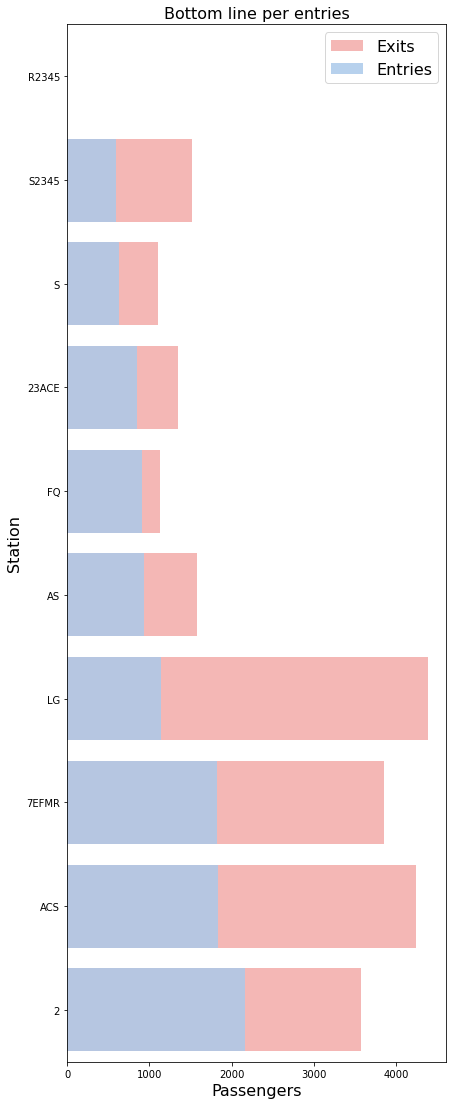

In [11]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=True).head(10)
plot_eda(entries_line,"Bottom line per entries","line_bottom")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Bottom line per exits'}, xlabel='Passengers', ylabel='Station'>)

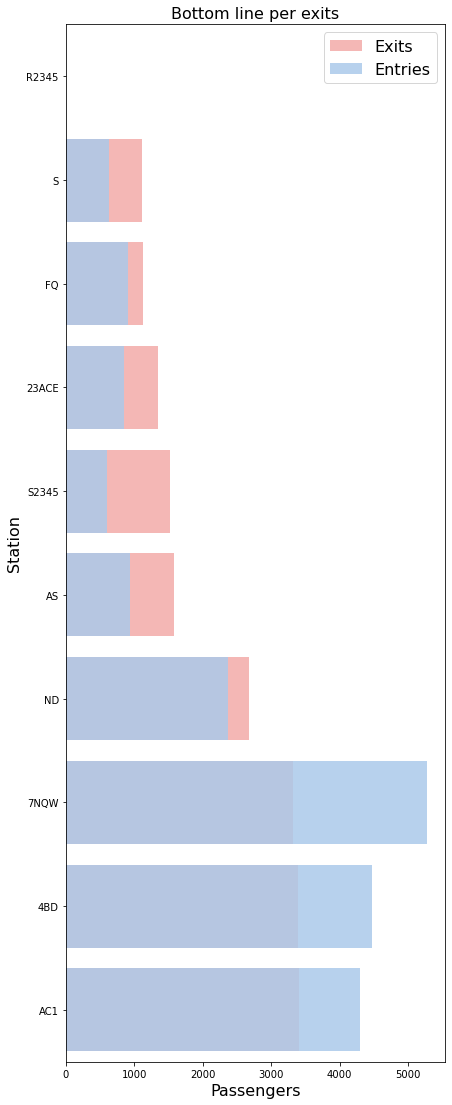

In [12]:
exits_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=True).head(10)
plot_eda(exits_line,"Bottom line per exits","line_bottom_exits")

(<Figure size 432x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'Top line per exits'}, xlabel='Passengers', ylabel='Station'>)

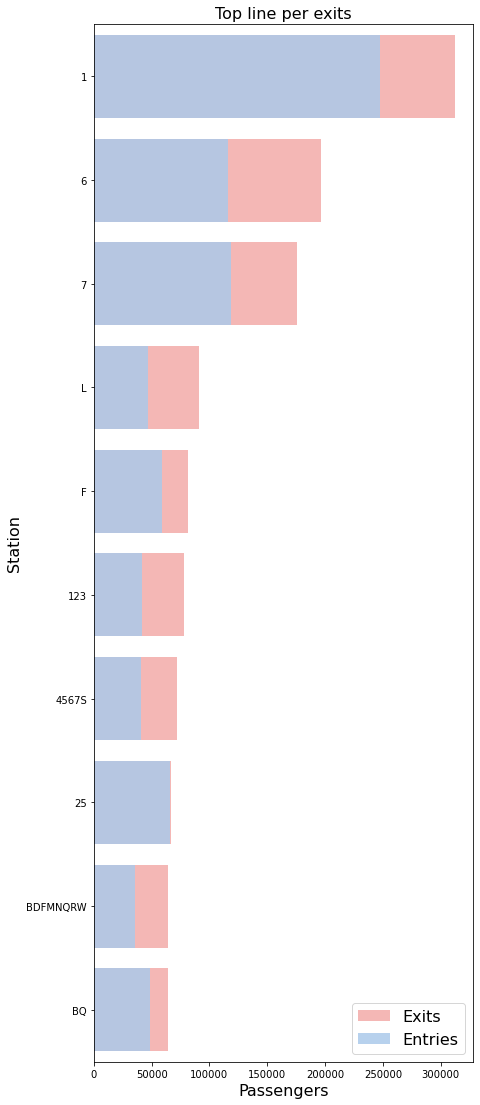

In [13]:
exits_line_top=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_line_top,"Top line per exits","line_top_exits")

Amount of people per day for the whole subway

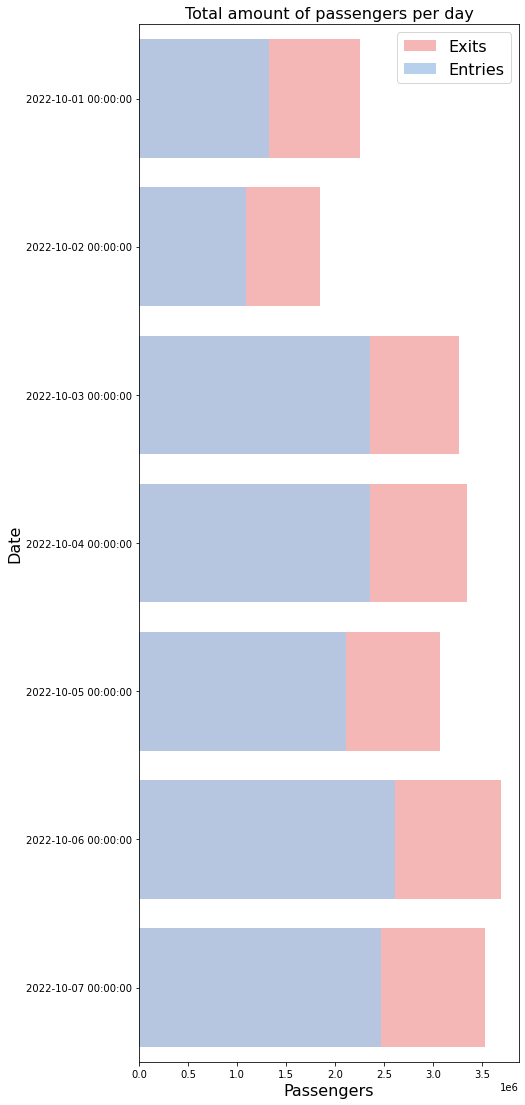

In [14]:

plot_eda(df.resample("D").sum().sort_index(),"Total amount of passengers per day","subway_amount","Date");


Subway load per hour

In [15]:
df

,stat_id,unit,scp,station,linename,entries_abs,exits_abs
datetime,,,,,,,
2022-10-01 00:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,92,474
2022-10-01 04:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,19,199
2022-10-01 08:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,10,167
2022-10-01 12:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,55,380
2022-10-01 16:00:00,1 AV 00-00-00 H007,R248,00-00-00,1 AV,L,91,580
...,...,...,...,...,...,...,...
2022-10-07 05:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0
2022-10-07 09:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0
2022-10-07 13:00:00,ZEREGA AV 00-05-01 R419,R326,00-05-01,ZEREGA AV,6,0,0


In [42]:
df.groupby(df.index.floor("4h")).sum()

,entries_abs,exits_abs
datetime,,
2022-10-01 00:00:00,217180,421256
2022-10-01 04:00:00,47753,117461
2022-10-01 08:00:00,136437,159887
2022-10-01 12:00:00,260248,401091
2022-10-01 16:00:00,353153,573126
2022-10-01 20:00:00,313320,577688
2022-10-02 00:00:00,154004,314165
2022-10-02 04:00:00,42777,106074
2022-10-02 08:00:00,100943,118948


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


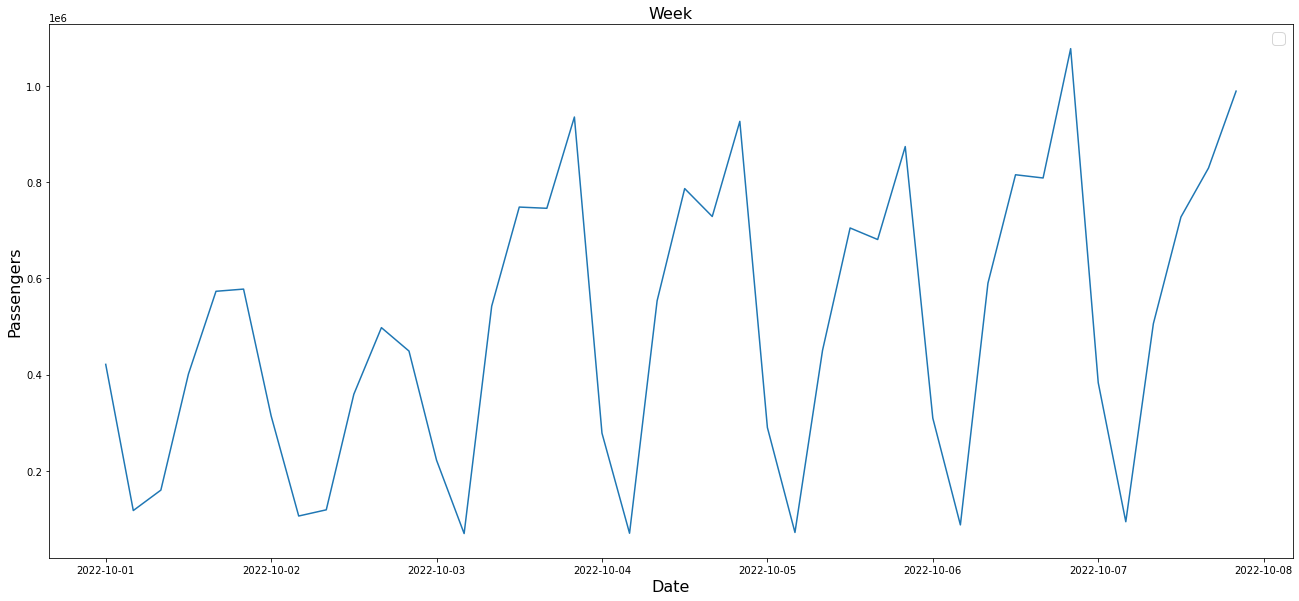

In [46]:

# Initialize the matplotlib figure   
f, ax = plt.subplots(figsize=(18, 8))
f.tight_layout()
# Plot
kwargs = {'alpha':0.85}
sns.set_color_codes("pastel")
sns.lineplot(data = df.groupby(df.index.floor("4h")).sum()["exits_abs"],ax=ax)
# sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
# sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
ax.set_title("Week",fontsize=16)
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel("Passengers", fontsize = 16)
ax.legend(fontsize = 16)
# plt.subplots_adjust(bottom=0.15,left=0.3,right=3)
# plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


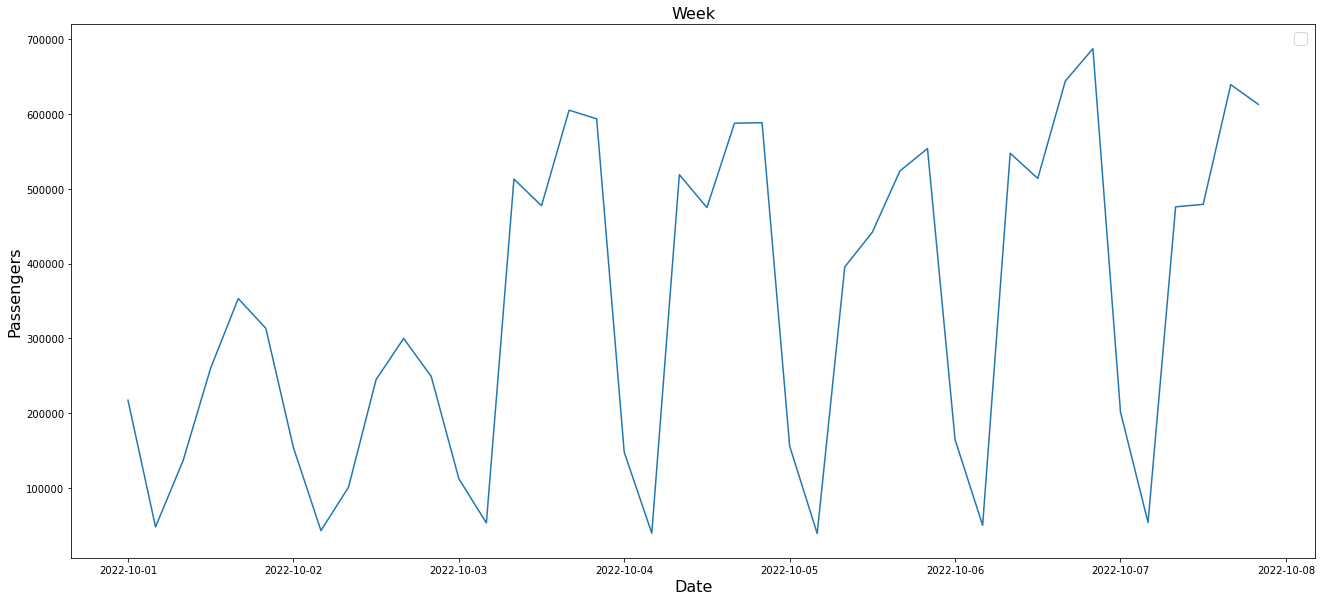

In [50]:
# Initialize the matplotlib figure   
f, ax = plt.subplots(figsize=(18, 8))
f.tight_layout()
# Plot
kwargs = {'alpha':0.85}
sns.set_color_codes("pastel")
sns.lineplot(data = df.groupby(df.index.floor("4h")).sum()["entries_abs"],ax=ax)
# sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
# sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
ax.set_title("Week",fontsize=16)
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel("Passengers", fontsize = 16)
ax.legend(fontsize = 16)
# plt.subplots_adjust(bottom=0.15,left=0.3,right=3)
# plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")

ValueError: Grouper and axis must be same length

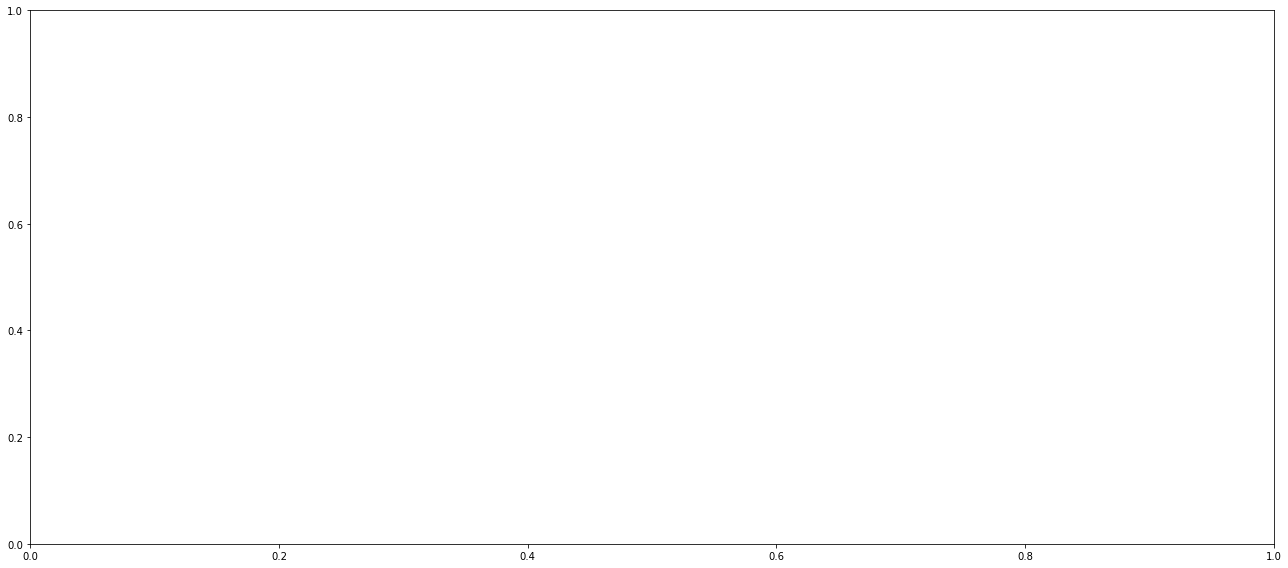

In [52]:
# Initialize the matplotlib figure   
f, ax = plt.subplots(figsize=(18, 8))
f.tight_layout()
# Plot
kwargs = {'alpha':0.85}
sns.set_color_codes("pastel")
sns.lineplot(data = df.loc["2022-10-04"].groupby(df.index.floor("4h")).sum()["entries_abs"],ax=ax)
# sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
# sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
ax.set_title("Week",fontsize=16)
ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel("Passengers", fontsize = 16)
ax.legend(fontsize = 16)
# plt.subplots_adjust(bottom=0.15,left=0.3,right=3)
# plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")

In [53]:
sns.lineplot(data = df.loc["2022-10-04"].groupby(df.index.floor("4h")).sum(),ax=ax)


ValueError: Grouper and axis must be same length

In [62]:
df.loc["2022-10-04"].groupby([df.index.floor("4h")])
# tt.groupby(df.index.floor("4h")).sum()


ValueError: Grouper and axis must be same length

In [40]:
df.exits_abs.sum()

20991169

In [41]:
df.entries_abs.sum()

14309812